# Geohash + CID


Geohash functionality in Python [pygeohash](https://github.com/wdm0006/pygeohash)


In [ ]:
#!pip install pygeohash

In [1]:
import pygeohash as pgh
##load geojson
import geopandas as gpd
import pandas as pd
import os

Can only import/use native python functions.


In [6]:
asset = "dc_restaurants"
geojson_path = f"../../data/maryland_demo/{asset}.geojson"

In [40]:
gpd.read_file("result.geojson")

,full_id,osm_id,osm_type,amenity,atm,opening_hours:bar,survey:date,brewery,payment:cheque,tourism,...,brand:wikidata,brand,addr:suite,addr:street,addr:state,addr:postcode,addr:housenumber,addr:city,entrance,geometry
0,n260321689,260321689,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,POINT (-76.94334 38.98321)
1,n571865059,571865059,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Wilson Boulevard,VA,22209,1723,NaN,NaN,POINT (-77.07888 38.89422)
2,n11289765028,11289765028,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-77.03241 38.90226)


In [7]:
import json
def calculate_offsets_and_lengths_stream(geojson_file_path):
    offsets_and_lengths = []
    feature_start_token = '"type": "Feature"'
    feature_end_token = '}' # Assuming each feature ends with a closing brace

    with open(geojson_file_path, 'r') as file:
        feature_start = None
        brace_count = 0

        while True:
            # Track the current position
            current_position = file.tell()

            # Read the next line
            line = file.readline()

            if not line:
                break  # End of file

            # Check for the start of a feature
            if feature_start_token in line and feature_start is None:
                feature_start = current_position
                brace_count = 0

            # Count braces to find the end of the feature
            if feature_start is not None:
                brace_count += line.count('{')
                brace_count -= line.count('}')

            # When the braces balance out, we've found the end of the feature
            if feature_start is not None and brace_count == 0:
                feature_end = current_position + len(line)
                offsets_and_lengths.append((feature_start, feature_end - feature_start))
                feature_start = None

    return offsets_and_lengths

# Example usage
offsets_lengths = calculate_offsets_and_lengths_stream(geojson_path)
for offset, length in offsets_lengths:
    print(f"Offset: {offset}, Length: {length}")

Offset: 157, Length: 3913
Offset: 4070, Length: 3919
Offset: 7989, Length: 4068
Offset: 12057, Length: 3913
Offset: 15970, Length: 3913
Offset: 19883, Length: 3912
Offset: 23795, Length: 3912
Offset: 27707, Length: 3935
Offset: 31642, Length: 3917
Offset: 35559, Length: 3918
Offset: 39477, Length: 3919
Offset: 43396, Length: 4005
Offset: 47401, Length: 3987
Offset: 51390, Length: 4036
Offset: 55426, Length: 4033
Offset: 59459, Length: 4037
Offset: 63496, Length: 4070
Offset: 67566, Length: 3941
Offset: 71507, Length: 3945
Offset: 75452, Length: 4044
Offset: 79496, Length: 4001
Offset: 83497, Length: 3959
Offset: 87456, Length: 3937
Offset: 91393, Length: 3972
Offset: 95365, Length: 4058
Offset: 99423, Length: 3939
Offset: 103362, Length: 4039
Offset: 107401, Length: 3980
Offset: 111381, Length: 4044
Offset: 115425, Length: 4019
Offset: 119444, Length: 4038
Offset: 123482, Length: 3943
Offset: 127425, Length: 4023
Offset: 131448, Length: 4052
Offset: 135500, Length: 4030
Offset: 139530,

In [43]:
offsets_lengths[0]

(157, 3913)

In [42]:
len(offsets_lengths)

2675

In [124]:
def extract_and_concatenate(file_path, chunks, suffix_string = "]\n}"):
    concatenated_data = ""
    with open(file_path, 'r') as file:
        res = []
        for i, (offset, length) in enumerate(chunks):
            file.seek(offset)
            data = file.read(length)
            # Remove trailing comma from the second chunk
            
            data = data.rstrip(',\n')
            res.append(data)
        
        concatenated_data += res[0]+",".join(res[1:])

    concatenated_data += suffix_string
    return concatenated_data

In [39]:

chunks = [(0, 157), (12057, 3913),(195698,4005),(10677350,3969)]
result = extract_and_concatenate(geojson_path, chunks, suffix_string = "]\n}")
with open('result.geojson', 'w') as of:
        of.write(result)

{
"type": "FeatureCollection",
"name": "dc_restaurants",
"crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:OGC:1.3:CRS84" } },
"features": [
{ "type": "Feature", "properties": { "full_id": "n260321689", "osm_id": "260321689", "osm_type": "node", "amenity": null, "atm": null, "opening_hours:bar": null, "survey:date": null, "brewery": null, "payment:cheque": null, "tourism": null, "artwork_type": null, "payment:notes": null, "diet:healthy": null, "diet:organic": null, "twitter": null, "opening_hours:lunch": null, "opening_hours:happy_hour": null, "opening_hours:dinner": null, "opening_date": null, "diet:kosher": null, "addr:place": null, "cocktails": null, "disused:name": null, "disused": null, "height": null, "vacant": null, "disused:shop": null, "organic": null, "payment:coins": null, "proposed:amenity": null, "name:zh": null, "karaoke": null, "old_name:vi": null, "contact:yelp": null, "alt_name:vi": null, "instagram": null, "name:eo": null, "proposed:shop": null, "prop

In [3]:
demo_points = gpd.read_file(f"../../data/maryland_demo/{asset}.geojson")

In [45]:
demo_points['offlen'] = offsets_lengths

In [60]:
head_offset_length = (0,offsets_lengths[0][0])

In [46]:
demo_points

,full_id,osm_id,osm_type,amenity,atm,opening_hours:bar,survey:date,brewery,payment:cheque,tourism,...,brand,addr:suite,addr:street,addr:state,addr:postcode,addr:housenumber,addr:city,entrance,geometry,offlen
0,n255342748,255342748,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,POINT (-76.94680 38.99221),"(157, 3913)"
1,n255342809,255342809,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,emergency,POINT (-76.94647 38.99222),"(4070, 3919)"
2,n258062907,258062907,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,Cafe Rio,D,Burke Centre Parkway,VA,22015,6003,Burke,NaN,POINT (-77.29676 38.78693),"(7989, 4068)"
3,n260321689,260321689,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,POINT (-76.94334 38.98321),"(12057, 3913)"
4,n260321700,260321700,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,POINT (-76.94354 38.98330),"(15970, 3913)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2670,n11275845269,11275845269,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Arlington Boulevard,VA,22042,7236,NaN,NaN,POINT (-77.19543 38.86694),"(10661166, 4035)"
2671,n11282521337,11282521337,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Little River Turnpike,VA,NaN,7438,NaN,NaN,POINT (-77.20221 38.83249),"(10665202, 4021)"
2672,n11285160608,11285160608,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,New Jersey Avenue Northwest,NaN,NaN,1545,NaN,NaN,POINT (-77.01643 38.91095),"(10669223, 4072)"
2673,n11286073597,11286073597,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,K Street Northwest,NaN,NaN,1108,NaN,NaN,POINT (-77.02754 38.90226),"(10673295, 4055)"


<Axes: >

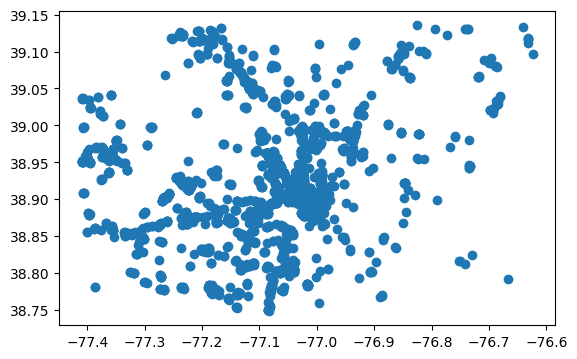

In [48]:
demo_points.plot()

In [49]:
demo_points = pd.concat([demo_points,demo_points.get_coordinates()],axis=1)

In [50]:
demo_points

,full_id,osm_id,osm_type,amenity,atm,opening_hours:bar,survey:date,brewery,payment:cheque,tourism,...,addr:street,addr:state,addr:postcode,addr:housenumber,addr:city,entrance,geometry,offlen,x,y
0,n255342748,255342748,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,yes,POINT (-76.94680 38.99221),"(157, 3913)",-76.946801,38.992208
1,n255342809,255342809,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,emergency,POINT (-76.94647 38.99222),"(4070, 3919)",-76.946472,38.992217
2,n258062907,258062907,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,Burke Centre Parkway,VA,22015,6003,Burke,NaN,POINT (-77.29676 38.78693),"(7989, 4068)",-77.296758,38.786931
3,n260321689,260321689,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,yes,POINT (-76.94334 38.98321),"(12057, 3913)",-76.943338,38.983212
4,n260321700,260321700,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,yes,POINT (-76.94354 38.98330),"(15970, 3913)",-76.943537,38.983299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2670,n11275845269,11275845269,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,Arlington Boulevard,VA,22042,7236,NaN,NaN,POINT (-77.19543 38.86694),"(10661166, 4035)",-77.195429,38.866937
2671,n11282521337,11282521337,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,Little River Turnpike,VA,NaN,7438,NaN,NaN,POINT (-77.20221 38.83249),"(10665202, 4021)",-77.202206,38.832492
2672,n11285160608,11285160608,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,New Jersey Avenue Northwest,NaN,NaN,1545,NaN,NaN,POINT (-77.01643 38.91095),"(10669223, 4072)",-77.016429,38.910949
2673,n11286073597,11286073597,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,K Street Northwest,NaN,NaN,1108,NaN,NaN,POINT (-77.02754 38.90226),"(10673295, 4055)",-77.027543,38.902256


In [51]:
# calculate geohash for each point feature as well as CID
import pygeohash as pgh
demo_points['geohash'] = demo_points.apply(lambda row: pgh.encode(row['y'], row['x'],precision=6), axis=1)

In [52]:
demo_points

,full_id,osm_id,osm_type,amenity,atm,opening_hours:bar,survey:date,brewery,payment:cheque,tourism,...,addr:state,addr:postcode,addr:housenumber,addr:city,entrance,geometry,offlen,x,y,geohash
0,n255342748,255342748,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,POINT (-76.94680 38.99221),"(157, 3913)",-76.946801,38.992208,dqcmc4
1,n255342809,255342809,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,emergency,POINT (-76.94647 38.99222),"(4070, 3919)",-76.946472,38.992217,dqcmc4
2,n258062907,258062907,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,VA,22015,6003,Burke,NaN,POINT (-77.29676 38.78693),"(7989, 4068)",-77.296758,38.786931,dqch9h
3,n260321689,260321689,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,POINT (-76.94334 38.98321),"(12057, 3913)",-76.943338,38.983212,dqcmc0
4,n260321700,260321700,node,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,yes,POINT (-76.94354 38.98330),"(15970, 3913)",-76.943537,38.983299,dqcmc0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2670,n11275845269,11275845269,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,VA,22042,7236,NaN,NaN,POINT (-77.19543 38.86694),"(10661166, 4035)",-77.195429,38.866937,dqcj57
2671,n11282521337,11282521337,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,VA,NaN,7438,NaN,NaN,POINT (-77.20221 38.83249),"(10665202, 4021)",-77.202206,38.832492,dqchgj
2672,n11285160608,11285160608,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1545,NaN,NaN,POINT (-77.01643 38.91095),"(10669223, 4072)",-77.016429,38.910949,dqcjr7
2673,n11286073597,11286073597,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1108,NaN,NaN,POINT (-77.02754 38.90226),"(10673295, 4055)",-77.027543,38.902256,dqcjr1


In [ ]:
# # Directory where the individual GeoJSON files will be saved
# directory = f"../data/geohash_{asset}"
# # Make sure the directory exists, if not create it
# if not os.path.exists(directory):
#     os.makedirs(directory)

# # Initialize an empty list to store file paths
# file_paths = []
# # Loop through each row in GeoDataFrame
# for index, row in demo_points.iterrows():
#     # Slice the GeoDataFrame to get a single feature (row)
#     single_feature_gdf = demo_points.iloc[[index]]

#     # Get 'osm_id' for the single feature
#     osm_id = row['osm_id']

#     # Define the full file path
#     file_path = os.path.join(directory, f"{osm_id}.geojson")

#     # Save single feature GeoDataFrame as GeoJSON
#     single_feature_gdf.to_file(file_path, driver="GeoJSON")

#     # Append file_path to list
#     file_paths.append(file_path)

# # Create a new column in the original GeoDataFrame to store file paths
# demo_points['single_path'] = file_paths

# demo_points

In [53]:
# #make sure ipfs daemon is running!!
# def compute_cid(file_path):
#     import subprocess
#     cid = subprocess.check_output(["ipfs", "add", "-qn", file_path]).decode().strip()
#     return cid

# #make sure ipfs daemon is running!!
# demo_points['single_cid'] = demo_points.apply(lambda x: compute_cid(x['single_path']),axis=1)

# demo_points.to_file(f"../../data/maryland_demo/{asset}_cid.geojson")

In [54]:
#arrange offset,length by geohash
pairs = list(zip(demo_points['geohash'],demo_points['offlen']))

In [57]:
class TrieNode:
    def __init__(self):
        self.children = {}
        self.value = []
class Trie:
    def __init__(self):
        self.root = TrieNode()

    def insert(self, index, value):
        node = self.root
        for char in str(index):
            if char not in node.children:
                node.children[char] = TrieNode()
            node = node.children[char]
        node.value.append(value)

    def get(self, index):
        node = self.root
        for char in str(index):
            if char not in node.children:
                return None
            node = node.children[char]
        return node.value

In [58]:
# Create an empty Trie dictionary
trie_dict = Trie()

# Insert each index-value pair into the Trie dictionary
for index, value in pairs:
    trie_dict.insert(index, value)

In [61]:
def export_trie(trie_node,geohash,root_path):
    #export geojson at current hash level
    next_path = root_path+"/"+"".join(geohash)
    leaf_path = root_path+f"/{geohash}.txt"
    print(geohash,root_path,next_path,leaf_path)
    if trie_node.value:
        # Open a file in write mode
        with open(leaf_path, 'w') as f:
            f.write(f"[CID placeholder]\n{head_offset_length}\n")
            for item in trie_node.value:
                f.write(f"{item}\n")
    #make path and export to sub folder
    import os 
    if trie_node.children and not os.path.exists(next_path):
        os.makedirs(next_path)
    for ch in trie_node.children:
        child_hash = geohash+ch
        export_trie(trie_node.children[ch],child_hash,next_path)

export_trie(trie_dict.root,"",f"../data/geohash_offset_{asset}/index")

 ../data/geohash_offset_dc_restaurants/index ../data/geohash_offset_dc_restaurants/index/ ../data/geohash_offset_dc_restaurants/index/.txt
d ../data/geohash_offset_dc_restaurants/index/ ../data/geohash_offset_dc_restaurants/index//d ../data/geohash_offset_dc_restaurants/index//d.txt
dq ../data/geohash_offset_dc_restaurants/index//d ../data/geohash_offset_dc_restaurants/index//d/dq ../data/geohash_offset_dc_restaurants/index//d/dq.txt
dqc ../data/geohash_offset_dc_restaurants/index//d/dq ../data/geohash_offset_dc_restaurants/index//d/dq/dqc ../data/geohash_offset_dc_restaurants/index//d/dq/dqc.txt
dqcm ../data/geohash_offset_dc_restaurants/index//d/dq/dqc ../data/geohash_offset_dc_restaurants/index//d/dq/dqc/dqcm ../data/geohash_offset_dc_restaurants/index//d/dq/dqc/dqcm.txt
dqcmc ../data/geohash_offset_dc_restaurants/index//d/dq/dqc/dqcm ../data/geohash_offset_dc_restaurants/index//d/dq/dqc/dqcm/dqcmc ../data/geohash_offset_dc_restaurants/index//d/dq/dqc/dqcm/dqcmc.txt
dqcmc4 ../data/g

In [ ]:
def merge_dict(dict1,dict2):
    return {k: list(set(dict1.get(k, [])).union(set(dict2.get(k, [])))) for k in set(dict1) | set(dict2)}

def compose_path(s,root):
    """
    compose path a/ab/abc for geohash `abc`
    """
    path = [root]
    for i in range(len(s)):
        path.append(s[:i+1])
    return "/".join(path)

def process_leaf_node(leaf):
    """
    process index leaf. [TODO]
    leaf: txt file path of a index leaf, like a//ab/abc.txt
    """
    with open(leaf, 'r', encoding='utf-8') as file:
        lines = file.readlines()
    return {lines[0].strip():[line.strip() for line in lines[1:]]}

def traverse_sub_node(node):
    """
    recursively collect all the leaf node under the current node
    """
    import os
    
    results={}
    excludes = [".ipynb_checkpoints"]
    # Get list of items in the directory
    subfolders = [d for d in os.listdir(node) if os.path.isdir(os.path.join(node, d)) and d not in excludes]
    # If there are subfolders, traverse them
    if subfolders:
        for subfolder in subfolders:
            results = merge_dict(results,traverse_sub_node(os.path.join(node, subfolder)))
    else:
        # Otherwise, process txt files in the directory
        txt_files = [f for f in os.listdir(node) if f.endswith('.txt')]
        for txt_file in txt_files:
            results = merge_dict(results,process_leaf_node(os.path.join(node, txt_file)))
    return results

In [119]:
def query_feature_offset_by_geohash(geohash: str, index_root: str) -> list:
    """
    find matching geohash or sub-level hashs
    """
    import os
    target_path = compose_path(geohash,index_root)
    cid_dict = {}
    if os.path.exists(target_path):
        cid_dict = traverse_sub_node(target_path)
    if os.path.exists(target_path+'.txt'):
        cid_dict = process_leaf_node(target_path+'.txt')
    return cid_dict


# def merge_dict(dict1,dict2):
#     return {k: dict1.get(k, []) + dict2.get(k, []) for k in set(dict1) | set(dict2)}

def multi_geohash_query(geohashes,index_root):
    results = {}
    for nei in geohashes:
        query = query_feature_offset_by_geohash(nei,index_root)
        if query:
            results = merge_dict(results,query)
    return results

In [120]:
geohashes = ['dqcnn', 'dqcjz', 'dqcjw', 'dqcjv', 'dqcnp', 'dqcjx', 'dqcjt', 'dqcnj']

In [121]:
results = multi_geohash_query(geohashes,f"../data/geohash_offset_{asset}/index")


5
13
2
6
3
{'[CID placeholder]': ['(2495880, 4055)', '(8234764, 4054)', '(8158335, 3942)', '(8282562, 4013)', '(10023147, 3973)', '(7837723, 3962)', '(9919814, 4157)', '(8676642, 3937)', '(7717359, 3931)', '(10102975, 3939)', '(6501522, 4038)', '(7382628, 3969)', '(5490065, 4091)', '(2515820, 3973)', '(8150460, 3936)', '(2487841, 3976)', '(2491817, 4063)', '(0, 157)', '(10106914, 3959)', '(9899742, 4027)', '(9331615, 3932)', '(8672701, 3941)', '(5514109, 4018)', '(2519793, 3933)', '(10099032, 3943)', '(10553304, 3940)', '(7797476, 4102)', '(8146521, 3939)', '(10309833, 3985)', '(8154396, 3939)']}
1
1
1
1
1
2
7
2
11
1
22
4
2
3
1
{'[CID placeholder]': ['(5949947, 4029)', '(2483908, 3933)', '(9335547, 3936)', '(71507, 3945)', '(1788850, 3993)', '(8948093, 3941)', '(8073983, 4057)', '(107401, 3980)', '(163545, 3997)', '(51390, 4036)', '(5219140, 3929)', '(4223682, 4063)', '(167542, 3959)', '(8094153, 3958)', '(3881012, 3958)', '(8086142, 4039)', '(1776933, 3984)', '(6157952, 4020)', '(6549

In [122]:
for cid in results:
    import ast
    
    offset_list = [ast.literal_eval(str_tuple) for str_tuple in sorted(results[cid])]
    print(len(offset_list))
    geojson = extract_and_concatenate(geojson_path, offset_list, suffix_string = "]\n}")
    with open(f'result_{cid}.geojson', 'w') as of:
        of.write(geojson)

330
{
"type": "FeatureCollection",
"name": "dc_restaurants",
"crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:OGC:1.3:CRS84" } },
"features": [
{ "type": "Feature", "properties": { "full_id": "n10863776715", "osm_id": "10863776715", "osm_type": "node", "amenity": "restaurant", "atm": null, "opening_hours:bar": null, "survey:date": null, "brewery": null, "payment:cheque": null, "tourism": null, "artwork_type": null, "payment:notes": null, "diet:healthy": null, "diet:organic": null, "twitter": null, "opening_hours:lunch": null, "opening_hours:happy_hour": null, "opening_hours:dinner": null, "opening_date": null, "diet:kosher": null, "addr:place": null, "cocktails": null, "disused:name": null, "disused": null, "height": null, "vacant": null, "disused:shop": null, "organic": null, "payment:coins": null, "proposed:amenity": null, "name:zh": null, "karaoke": null, "old_name:vi": null, "contact:yelp": null, "alt_name:vi": null, "instagram": null, "name:eo": null, "proposed:sh

In [125]:
geojson

'{\n"type": "FeatureCollection",\n"name": "dc_restaurants",\n"crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:OGC:1.3:CRS84" } },\n"features": [{ "type": "Feature", "properties": { "full_id": "n10863776715", "osm_id": "10863776715", "osm_type": "node", "amenity": "restaurant", "atm": null, "opening_hours:bar": null, "survey:date": null, "brewery": null, "payment:cheque": null, "tourism": null, "artwork_type": null, "payment:notes": null, "diet:healthy": null, "diet:organic": null, "twitter": null, "opening_hours:lunch": null, "opening_hours:happy_hour": null, "opening_hours:dinner": null, "opening_date": null, "diet:kosher": null, "addr:place": null, "cocktails": null, "disused:name": null, "disused": null, "height": null, "vacant": null, "disused:shop": null, "organic": null, "payment:coins": null, "proposed:amenity": null, "name:zh": null, "karaoke": null, "old_name:vi": null, "contact:yelp": null, "alt_name:vi": null, "instagram": null, "name:eo": null, "proposed:sh

In [126]:
gpd.read_file(geojson)

,full_id,osm_id,osm_type,amenity,atm,opening_hours:bar,survey:date,brewery,payment:cheque,tourism,...,brand:wikidata,brand,addr:suite,addr:street,addr:state,addr:postcode,addr:housenumber,addr:city,entrance,geometry
0,n10863776715,10863776715,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-77.05144 39.04216)
1,n10979494184,10979494184,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-77.04775 39.04156)
2,n10979494185,10979494185,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-77.04773 39.04166)
3,n10979539541,10979539541,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-77.05213 39.04023)
4,n11113180851,11113180851,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Wilkins Court,NaN,NaN,12307,NaN,NaN,POINT (-77.11267 39.05782)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,n10736129393,10736129393,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,East West Highway,NaN,NaN,1302,NaN,NaN,POINT (-77.03224 38.99244)
325,n10748530279,10748530279,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Summit Avenue,MD,20895,10525,Kensington,NaN,POINT (-77.07835 39.02892)
326,n10771881091,10771881091,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Cordell Avenue,MD,20814,4931,Bethesda,NaN,POINT (-77.09908 38.98853)
327,n10773917564,10773917564,node,restaurant,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Georgia Avenue,MD,20906,12321,Silver Spring,NaN,POINT (-77.04955 39.05936)


In [2]:
import sys
sys.path.append("../")

In [3]:
from geohashtree.geohashtree import LiteTreeOffset

Can only import/use native python functions.
